In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

/tmp/ipykernel_10747/1543584708.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# kaggle: https://www.kaggle.com/datasets/deepikaarikesavan/water-quality
# download, save and rename the dataset first please
df = pd.read_csv("./data/Water_Quality_Prediction.csv")

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Index,1048575.0,524287.000000,302697.673595,0.000000e+00,2.621435e+05,5.242870e+05,7.864305e+05,1.048574e+06
pH,1028344.0,7.449869,0.847846,2.058008e+00,6.914812e+00,7.452940e+00,8.001406e+00,1.289196e+01
Iron,1041584.0,0.113965,0.443319,2.050000e-53,8.950000e-06,2.054149e-03,4.977795e-02,1.574860e+01
Nitrate,1029880.0,6.078584,3.131874,2.861727e-01,3.952811e+00,5.564798e+00,7.584930e+00,7.307293e+01
Chloride,1017741.0,181.865998,65.766569,2.941350e+01,1.374347e+02,1.747464e+02,2.156446e+02,1.430549e+03
Lead,1043891.0,0.001292,0.030301,0.000000e+00,8.290000e-123,1.520000e-62,2.820000e-27,3.503948e+00
Zinc,1020900.0,1.528928,1.505436,6.350000e-07,4.127921e-01,1.074800e+00,2.214154e+00,2.836867e+01
Turbidity,1039881.0,0.483591,0.861474,1.410000e-14,3.692472e-02,1.997574e-01,5.928613e-01,1.929611e+01
Fluoride,1015357.0,0.941014,0.792490,4.550000e-06,3.706065e-01,7.654291e-01,1.318265e+00,1.285171e+01
Copper,1013693.0,0.493944,0.566243,2.100000e-09,1.260900e-01,3.389322e-01,6.789152e-01,1.139056e+01


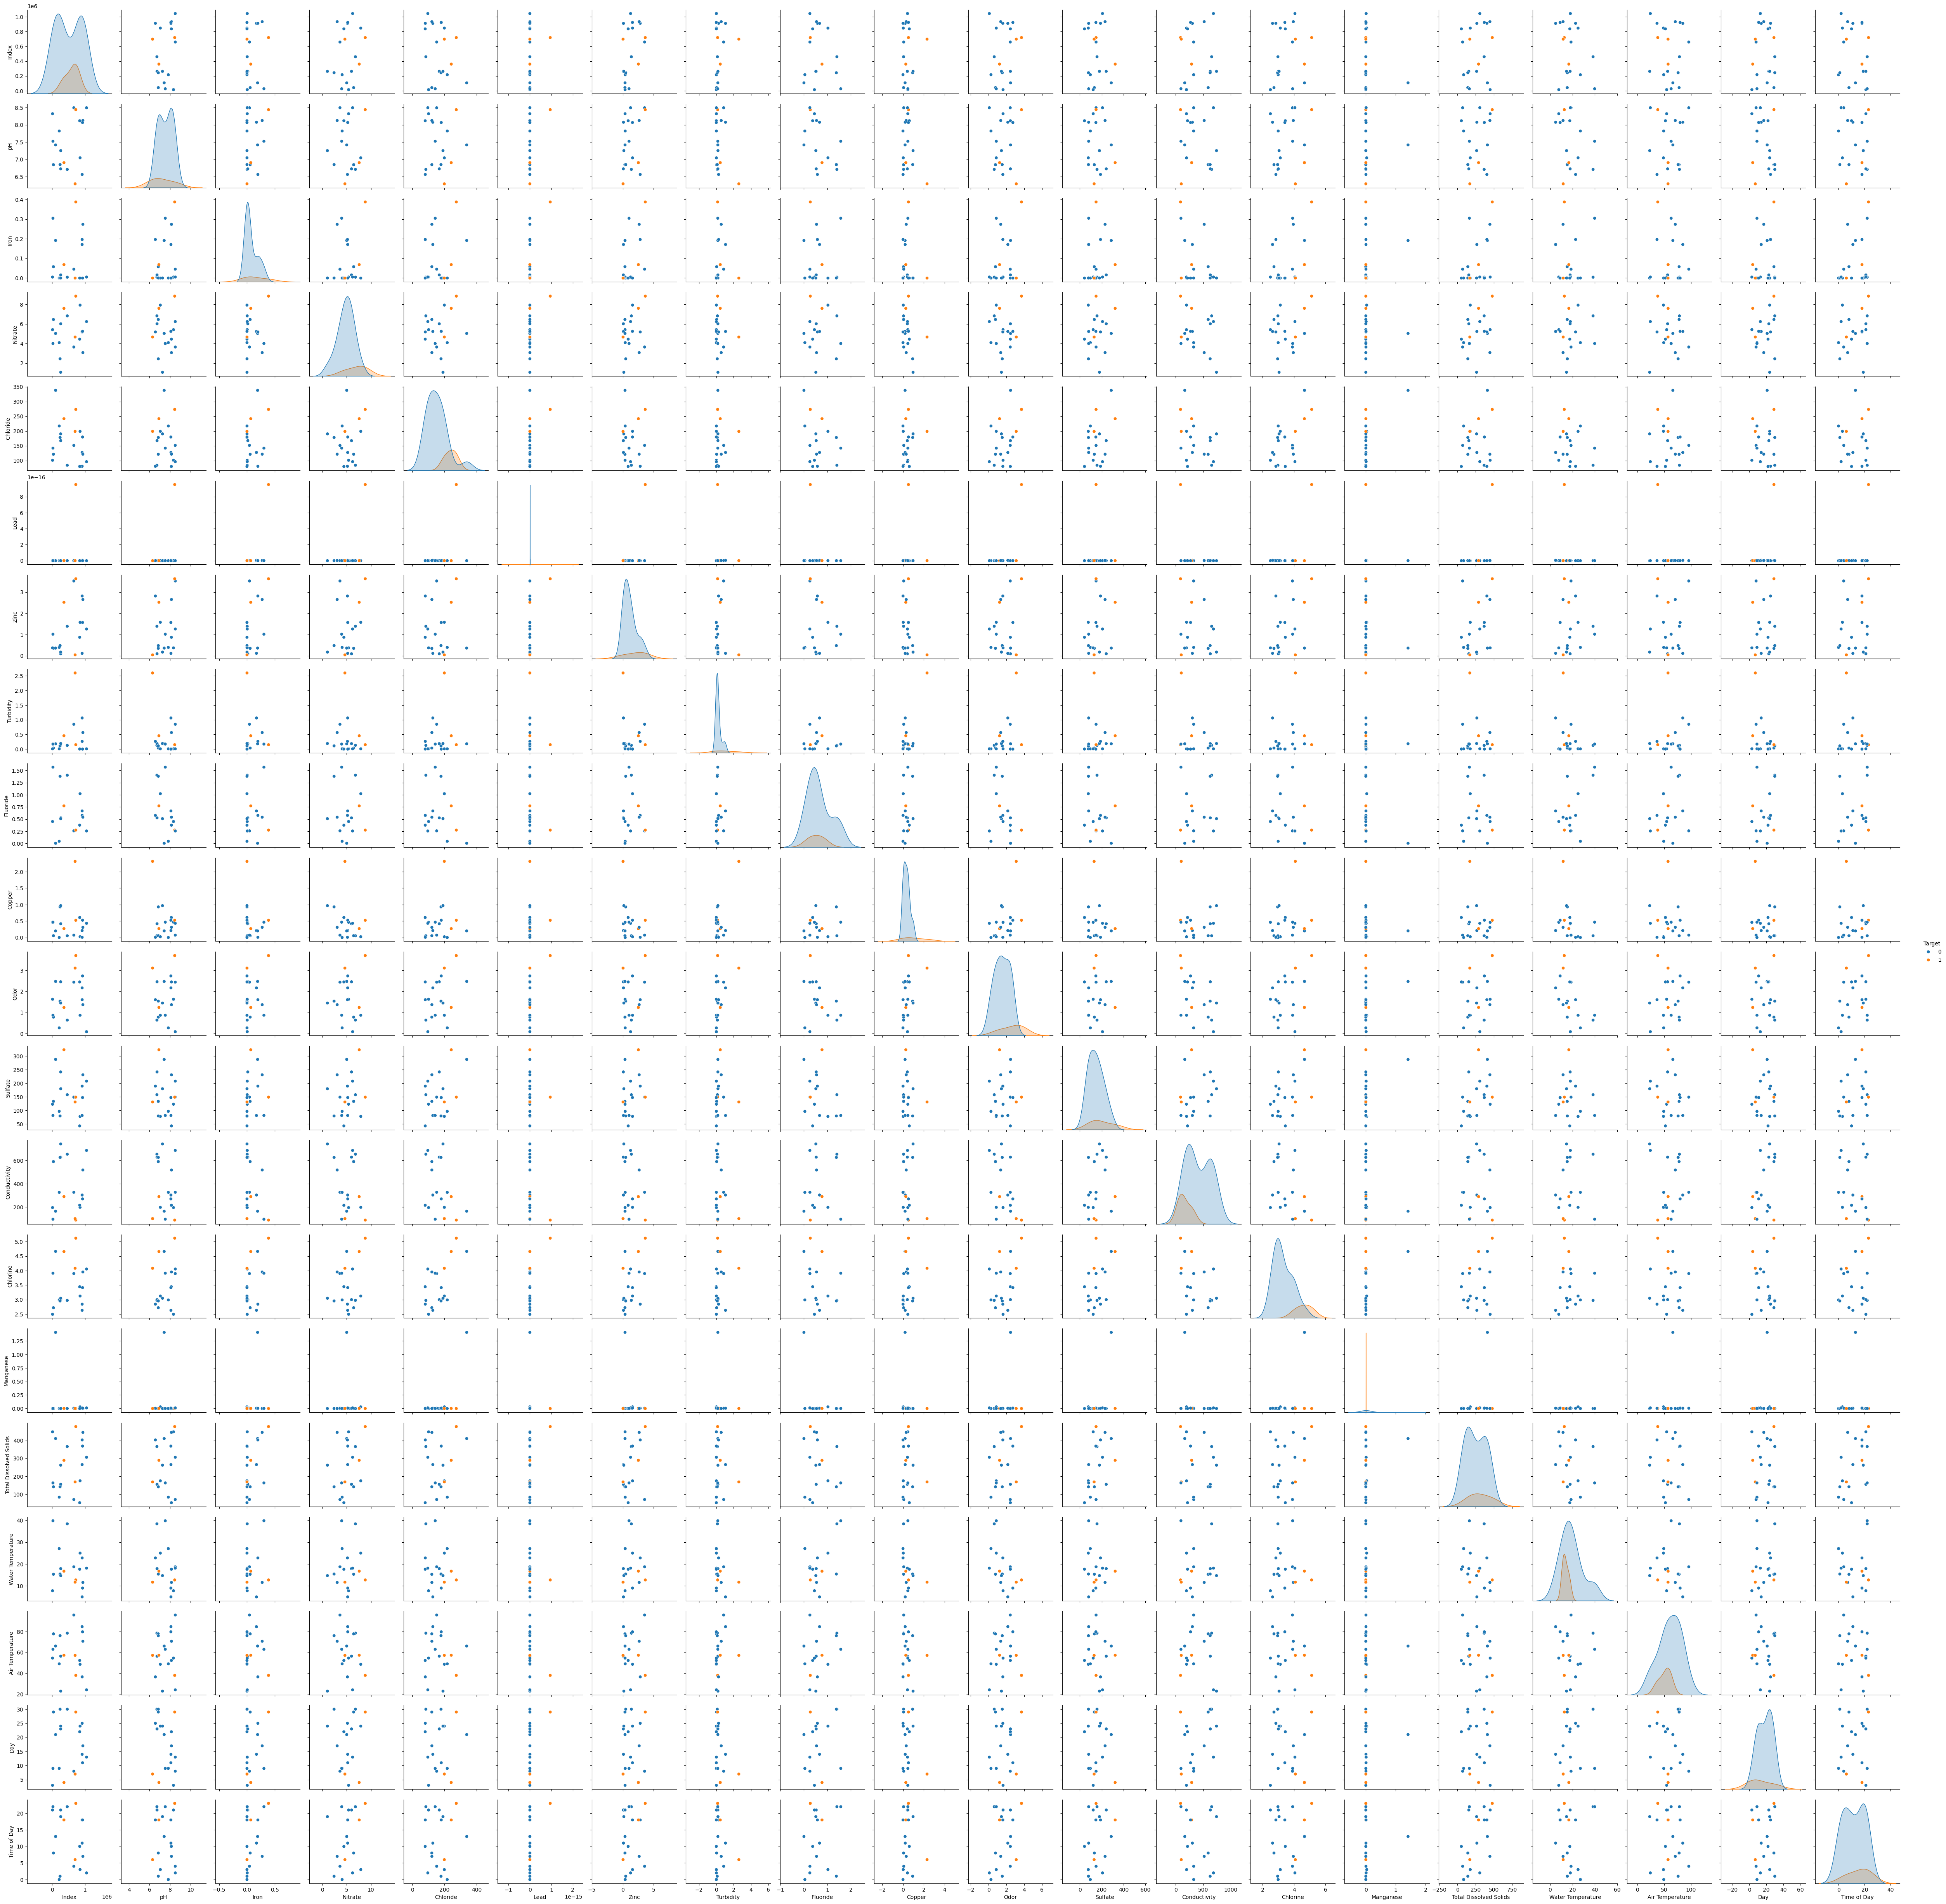

In [5]:
sns.pairplot(df.sample(n=20), hue="Target")

In [6]:
df.shape

(1048575, 24)

In [7]:
df.dropna().shape

(701056, 24)

In [8]:
df_wo = df.dropna()

In [9]:
df_wo.shape

(701056, 24)

In [10]:
np.unique(df_wo["Color"])

array(['Colorless', 'Faint Yellow', 'Light Yellow', 'Near Colorless',
       'Yellow'], dtype=object)

In [11]:
def enumify(column):
  unique = list(np.unique(df_wo[column]))
  df_wo[column] = df_wo[column].map(lambda x: unique.index(x))

In [12]:
df_wo.columns

Index(['Index', 'pH', 'Iron', 'Nitrate', 'Chloride', 'Lead', 'Zinc', 'Color',
       'Turbidity', 'Fluoride', 'Copper', 'Odor', 'Sulfate', 'Conductivity',
       'Chlorine', 'Manganese', 'Total Dissolved Solids', 'Source',
       'Water Temperature', 'Air Temperature', 'Month', 'Day', 'Time of Day',
       'Target'],
      dtype='object')

In [13]:
enumify("Color")
df_wo = df_wo.drop(columns=["Month", "Day", "Source"])

/tmp/ipykernel_10747/2604728478.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wo[column] = df_wo[column].map(lambda x: unique.index(x))


In [14]:
df_wo = df_wo.drop(columns=["Index", "Time of Day", "Conductivity"])

In [15]:
df_wo = df_wo.drop(columns=["pH"])

In [16]:
# df_wo = df_wo.drop(columns=["pH"])

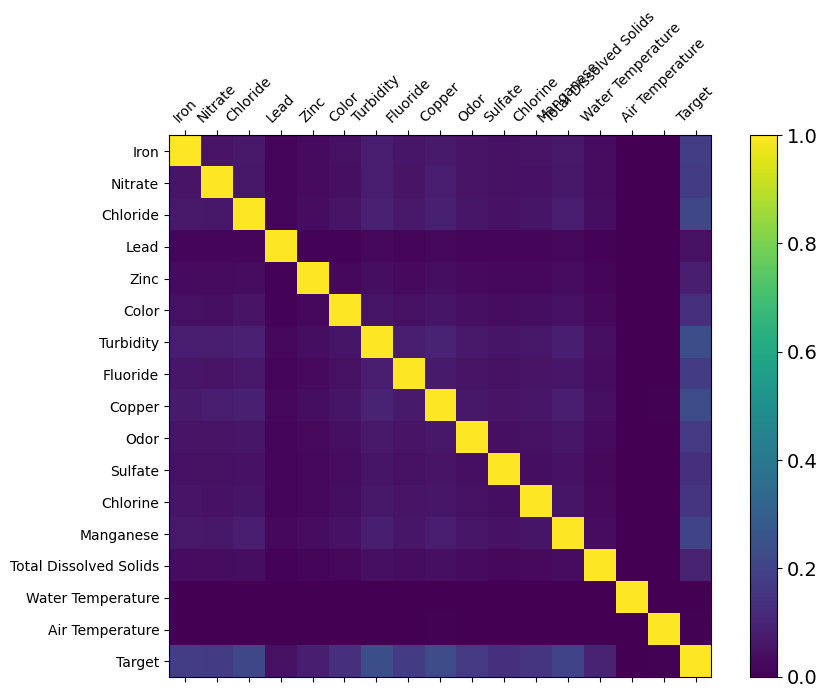

In [17]:
fig = plt.figure(figsize=(10, 7))
plt.matshow(df_wo.corr(), fignum=fig.number)
plt.xticks(
    range(df_wo.select_dtypes(["number"]).shape[1]),
    df_wo.select_dtypes(["number"]).columns,
    fontsize=10,
    rotation=45,
)
plt.yticks(
    range(df_wo.select_dtypes(["number"]).shape[1]),
    df_wo.select_dtypes(["number"]).columns,
    fontsize=10,
)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

In [18]:
df_wo.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Iron,701056.0,0.114242,0.443592,8.010000e-45,9.000000e-06,2.063006e-03,4.975946e-02,15.748603
Nitrate,701056.0,6.077584,3.130819,2.861727e-01,3.949197e+00,5.564817e+00,7.585966e+00,69.731244
Chloride,701056.0,181.887010,65.789558,2.941350e+01,1.374212e+02,1.747447e+02,2.157111e+02,1430.548852
Lead,701056.0,0.001300,0.030484,0.000000e+00,8.647500e-123,1.695000e-62,2.950000e-27,3.503948
Zinc,701056.0,1.528468,1.502938,6.350000e-07,4.138602e-01,1.075199e+00,2.215828e+00,28.368672
Color,701056.0,1.665759,1.392867,0.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,4.000000
Turbidity,701056.0,0.483853,0.863372,1.410000e-14,3.703272e-02,1.996362e-01,5.923177e-01,19.296113
Fluoride,701056.0,0.941325,0.792704,4.550000e-06,3.706112e-01,7.656295e-01,1.318171e+00,12.851710
Copper,701056.0,0.494381,0.567014,4.440000e-08,1.259449e-01,3.391531e-01,6.790050e-01,10.717320
Odor,701056.0,1.773779,1.051451,1.100623e-02,8.781782e-01,1.745384e+00,2.612347e+00,4.141952


In [19]:
X, y = df_wo.drop(columns=["Target"]), df_wo["Target"]

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()
scaler.fit(X, y)

StandardScaler()

In [22]:
X = scaler.fit_transform(X)

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, test_size=0.2
)

In [24]:
import tensorflow as tf

2024-02-17 19:01:19.739372: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-17 19:01:19.830933: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-17 19:01:19.831037: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-17 19:01:19.856147: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-17 19:01:19.905745: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-17 19:01:19.906756: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [25]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(64, activation="relu", input_shape=(64,)),
        tf.keras.layers.Dense(1, activation="softmax"),
    ]
)

2024-02-17 19:01:22.152889: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-17 19:01:22.154397: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1088      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5313 (20.75 KB)
Trainable params: 5313 (20.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [28]:
history = model.fit(X_train, y_train, epochs=20, batch_size=512, validation_split=0.1)

Epoch 1/20


2024-02-17 19:01:22.435598: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 32304576 exceeds 10% of free system memory.


986/986 [==============================] - 3s 3ms/step - loss: 0.3606 - accuracy: 0.2296 - val_loss: 0.3296 - val_accuracy: 0.2304
Epoch 2/20
986/986 [==============================] - 2s 2ms/step - loss: 0.3228 - accuracy: 0.2296 - val_loss: 0.3168 - val_accuracy: 0.2304
Epoch 3/20
986/986 [==============================] - 2s 2ms/step - loss: 0.3105 - accuracy: 0.2296 - val_loss: 0.3076 - val_accuracy: 0.2304
Epoch 4/20
986/986 [==============================] - 3s 3ms/step - loss: 0.3037 - accuracy: 0.2296 - val_loss: 0.3022 - val_accuracy: 0.2304
Epoch 5/20
986/986 [==============================] - 2s 2ms/step - loss: 0.2982 - accuracy: 0.2296 - val_loss: 0.2969 - val_accuracy: 0.2304
Epoch 6/20
986/986 [==============================] - 3s 3ms/step - loss: 0.2935 - accuracy: 0.2296 - val_loss: 0.2928 - val_accuracy: 0.2304
Epoch 7/20
986/986 [==============================] - 2s 2ms/step - loss: 0.2898 - accuracy: 0.2296 - val_loss: 0.2902 - val_accuracy: 0.2304
Epoch 8/20
986/98

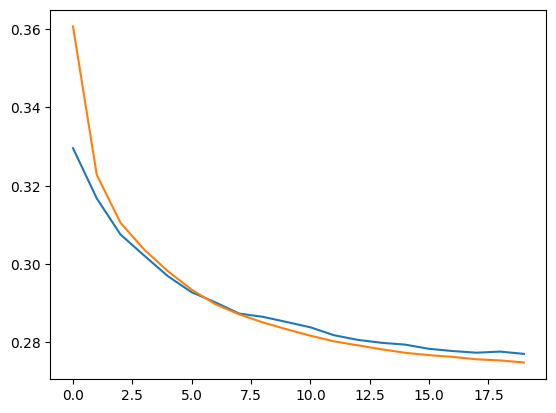

In [29]:
plt.plot(history.history["val_loss"])
plt.plot(history.history["loss"])

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
y_pred = model.predict(X_test)

4382/4382 [==============================] - 4s 895us/step


In [32]:
y_pred_floored = np.floor(y_pred)
accuracy_score(y_test, y_pred_floored)

0.7683151228140245

In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
confusion_matrix(y_test, y_pred_floored)

array([[107725,      2],
       [ 32483,      2]])